# Face Completion With Multi-Estimator Output: Home
Nick Fonseca  
CPSC 483-01  
Spring 2022  

## Project Index
Due to the scope and various failed attempts undertaken in this project, this Notebook serves as an index, with links to other notebooks. I hope this organizational pattern allows for easier browsing.

[Pre-processing Notebook](./pre_processing.ipynb).

[Estimator Notebook](./esimators.ipynb).

## This Notebook index

### Current Workflow
Pre-Processing

Regressors and Results

### Abandoned Workflows
The abandoned tasks are not documented in seperate notebooks, but are documented in this notebook.
Landmarks Pre-Processing

DCGAN

## Summary
This section will summarize the above work by running the "final product" of each of the above sctions.

### Pre-Processing
The pre-processing pipeline takes any arbitrary image with a face in it, and crops, aligns, and resizes the image until only the face exists in a 128x128 image. It also warps and flips the face so the image is guaranteed to be split down the middle by x=64, and to have the face in the same orientation.

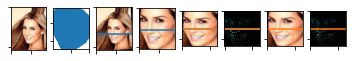

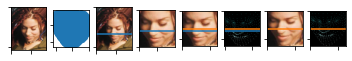

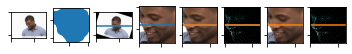

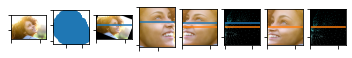

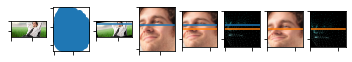

In [3]:
from rgb_preprocessing import align_and_crop
import os

EXAMPLE_FOLDER = os.path.join('example','inputs','preprocessing')

# For each image in the example/preprocessing folder
## Run the processing with plot=True
for fname in os.listdir(EXAMPLE_FOLDER):
    align_and_crop(os.path.join(EXAMPLE_FOLDER, fname), 
                   os.devnull,
                   True)

The plots, in order, are:
 - The original image
 - The facial landmarks
 - The image re-aligned based on the angle between x=0 and the eye points
 - The image cropped to the face
 - The image scaled to 128,128 and flipped if the nose point was on the right side
 - The landmarks plotted onto an image, with the same adjustments as above
 - The image warped so the that half the image is half of the face
 - The landmarks warped as above
 
While several stages of this workflow are actually saved in `align_and_crop`, only is "Warped" is consumed later. Future work would be to train models to predict "Warped Landmarks" in someway as well. 

## Regressors and Results
Seven regressors total were used (ten if the extra K-nn and extra Pluralistic Image Completion run are counted). Unfortunately, Pluralistic Image Completion is not able to be run in a Jupyter (see notes in Regressors and Results notebook). Instead, eight regressors are run over a 100 sample subset, with an 80/20 test train split.

Start
Read finish: 0.3s
Estimator Linear Regression start
Estimator Linear Regression fit finish: 1.4s
Estimator Linear Regression predict finish: 0.1s
Estimator SVM start
Estimator SVM fit finish: 105.8s
Estimator SVM predict finish: 137.0s
Estimator 1K-nn start
Estimator 1K-nn fit finish: 2.9s
Estimator 1K-nn predict finish: 0.4s
Estimator 5K-nn start
Estimator 5K-nn fit finish: 0.0s
Estimator 5K-nn predict finish: 0.1s
Estimator 15K-nn start
Estimator 15K-nn fit finish: 0.0s
Estimator 15K-nn predict finish: 0.1s
Estimator Decision Tree start
Estimator Decision Tree fit finish: 0.2s
Estimator Decision Tree predict finish: 0.0s
Estimator Random Forest start
Estimator Random Forest fit finish: 0.9s
Estimator Random Forest predict finish: 0.0s
Estimator MLP Regressor start
Estimator MLP Regressor fit finish: 16.0s
Estimator MLP Regressor predict finish: 0.0s
All estimator work finished in 264.9s


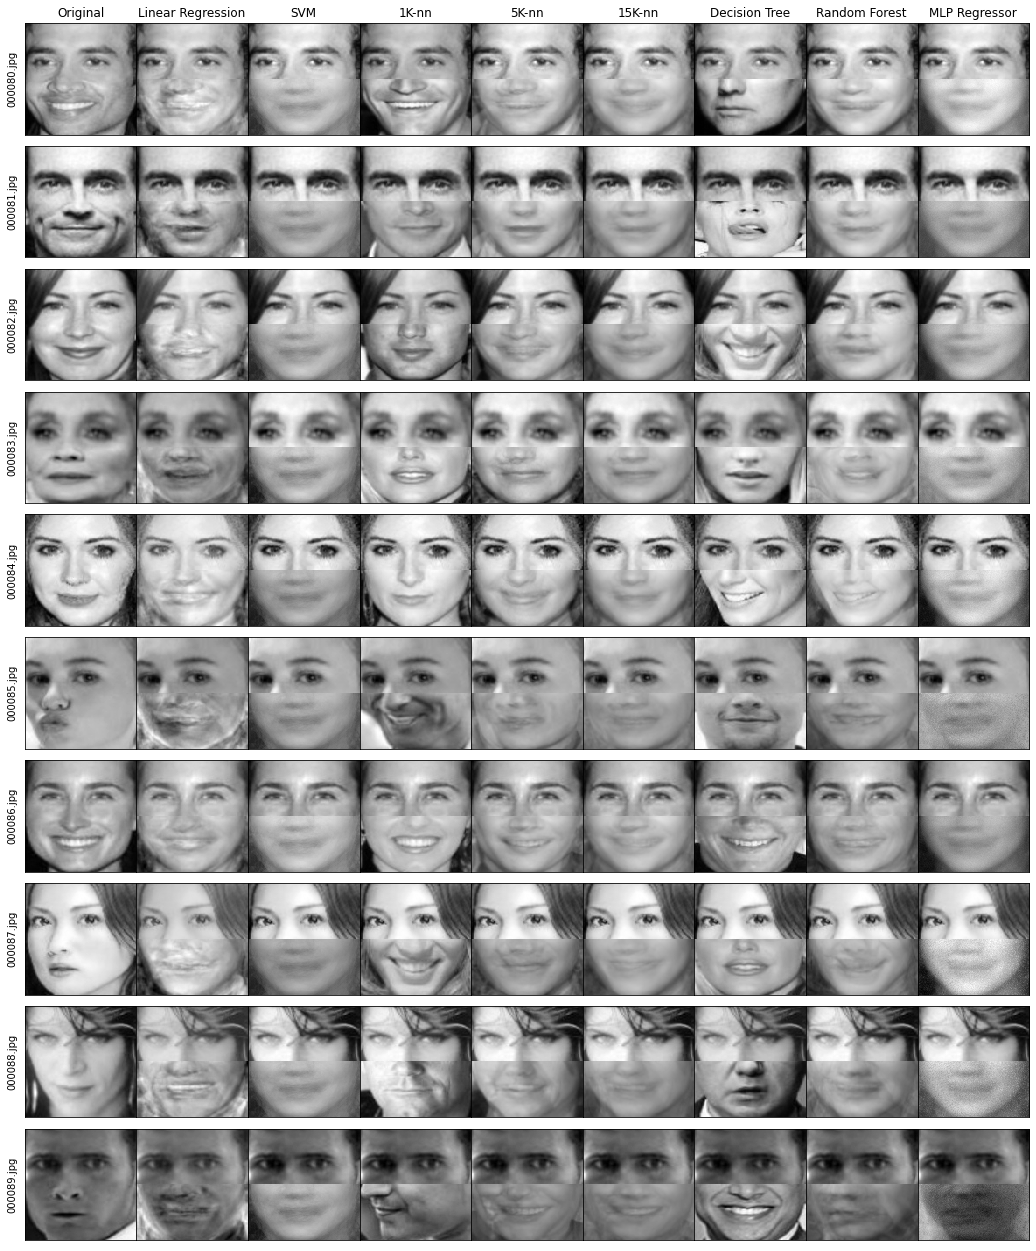

In [1]:
from dask_fcmeo import run_models

import os
NUM_SAMPLES=100

run_models(NUM_SAMPLES, False, True)

Results have been pre-calculated. They match what is shown in the paper. A different set of values, for a KFold regression, is shown in the regressors and results section.

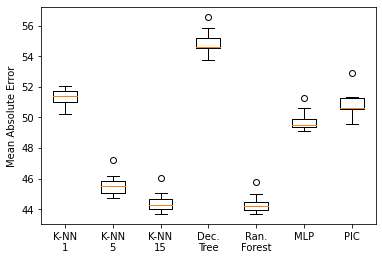

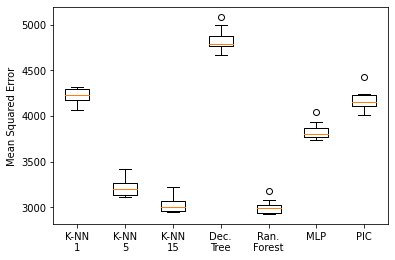

In [5]:
import matplotlib.pyplot as plt

pre_calc_mae = {'dectree': [53.73702106813965, 55.002647908886715, 54.554674498681635, 56.583252340063474, 55.26738128679199, 55.84300322270508, 53.76914362265625, 54.552530322265625, 54.538129758886726, 54.70879730808105], 'mlp': [49.68425986130371, 49.479671382861326, 49.46216379267578, 51.27425766159668, 50.004988630590816, 50.604417308642574, 49.301476638867186, 49.46981415424804, 49.12647847041015, 49.23637954572754], 'neigh1': [51.25827987917481, 50.216530478710936, 51.92652861425781, 52.027444899194336, 51.52573917263183, 51.775889474218744, 51.032759095458985, 51.49924414345703, 50.95979728623047, 50.678954024145504], 'neigh5': [45.89992200212402, 44.75533647827148, 45.770080942187505, 47.24433725671386, 45.57417185012207, 46.18594603867187, 45.51745939975586, 45.327885431591795, 45.01461078886719, 44.81121898537597], 'neigh15': [44.65841012224121, 43.67527842504883, 44.5827262796875, 46.05938189763184, 44.37829211179199, 45.053099447949215, 44.1807533024414, 44.004155082861324, 44.212963379248045, 43.81160247785644], 'ranfor': [44.3282982697998, 43.72836283286133, 44.54199187255859, 45.78356360314941, 44.35379077243652, 44.985491407470704, 44.155188613330075, 43.93732500209961, 44.104245887353514, 43.66837519396972], 'pic_gsc': [51.34666614533691, 49.591262914111326, 51.331447895947264, 52.902299745434576, 50.524507914233396, 50.68645274565429, 50.427903893212886, 50.56237266328125, 50.9968932184082, 50.531550235375974]}
pre_calc_mse = {'dectree': [4670.3779357981475, 4863.825476793044, 4760.16339359658, 5087.126526318023, 4879.857870924448, 4998.723126560906, 4667.869727925425, 4772.142639031101, 4776.370052032033, 4804.054433301395], 'mlp': [3848.0430659185577, 3794.6656069600845, 3800.122779102928, 4045.4538379431206, 3876.980112561362, 3935.269339666863, 3786.626925692173, 3766.341905341404, 3738.8660393497084, 3764.2129842364525], 'neigh1': [4262.214044521243, 4060.4875331770763, 4319.544975979392, 4311.599975391021, 4205.767124188511, 4312.866333358757, 4183.2308756765, 4253.870506164743, 4171.801102160255, 4122.58659456824], 'neigh5': [3293.487103461429, 3124.0695986205337, 3232.392639282908, 3422.147756289556, 3209.015740805845, 3272.8348206920095, 3188.866044242807, 3166.492717346873, 3124.8379156548353, 3114.182704563503], 'neigh15': [3089.9350007639678, 2947.802670075221, 3037.8790610954566, 3222.465487510357, 3020.5510183287943, 3085.4343530476244, 2986.0664791564795, 2957.880014630613, 2982.592981905812, 2947.584446002566], 'ranfor': [3023.126034752103, 2929.0582823213153, 3027.8081208795875, 3176.4908570738335, 3004.093636746128, 3078.6293996008962, 2981.9544453266944, 2932.7378296723123, 2958.176971652687, 2922.9714249686303], 'pic_gsc': [4239.19564876724, 4009.709015647292, 4234.787209605125, 4431.14563755484, 4105.221962822983, 4158.677291376483, 4098.075268255356, 4116.973267151365, 4203.085248074709, 4136.189455870486]}
folders = ['neigh1', 'neigh5', 'neigh15', 'dectree', 'ranfor', 'mlp', 'pic_gsc']
nice_names = ['K-NN\n1', 'K-NN\n5', 'K-NN\n15', "Dec.\nTree", 'Ran.\nForest', 'MLP', "PIC"]
values = [pre_calc_mae[k] for k in folders]
plt.boxplot(values)
plt.xticks(range(1, len(nice_names) + 1), nice_names)
plt.ylabel('Mean Absolute Error')
plt.show()

values = [pre_calc_mse[k] for k in folders]
plt.boxplot(values)
plt.xticks(range(1, len(nice_names) + 1), nice_names)
plt.ylabel('Mean Squared Error')
plt.show()

As mentioned in the paper, PIC performs exceptionally poorly. The reasons for this are many:
 - Lack of training
 - PIC is trained to produce multiple outputs and let the end-user chose, but only one output was generated in this situation
 - MSE and MAE are likely not the correct metrics to use in this case

## Abandoned Pre-processing pipeline
This pre-processing pipeline was abandoned due to complexity of both it and the actual process of regressing over it and returning an image. 

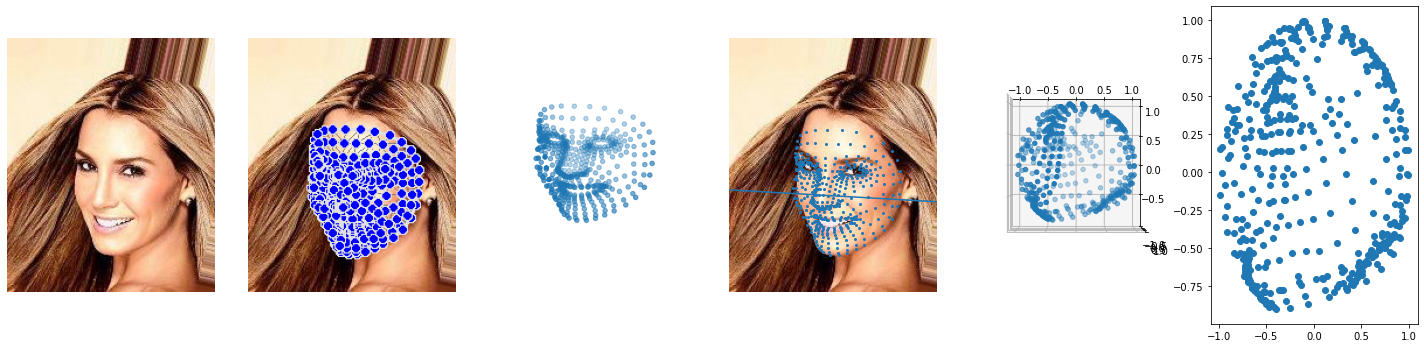

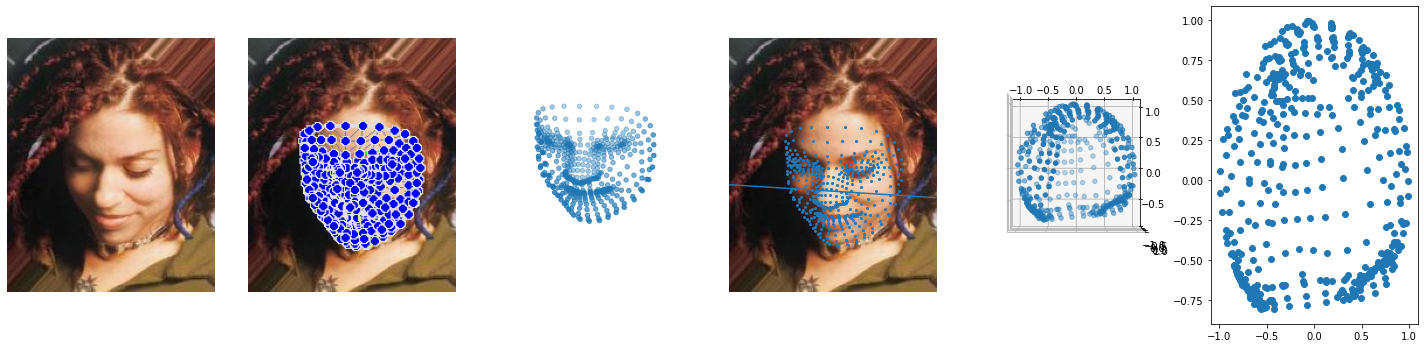

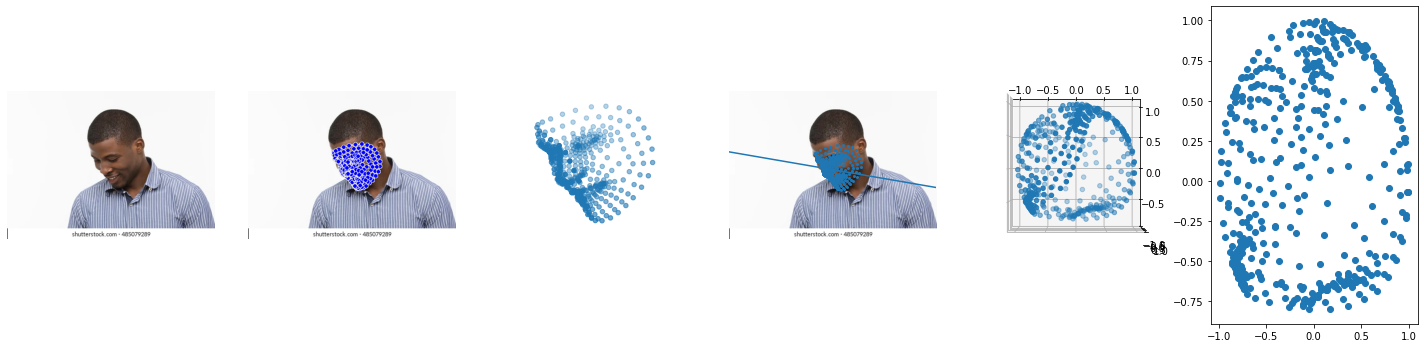

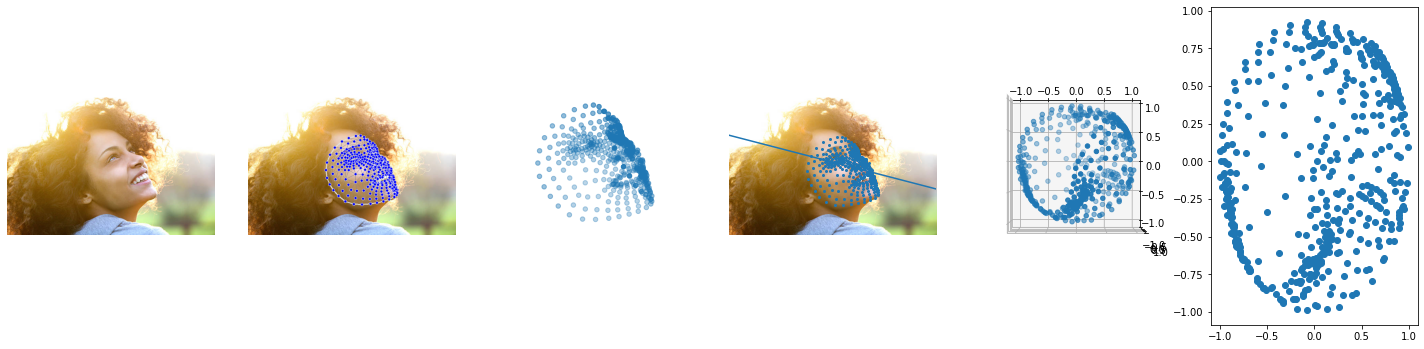

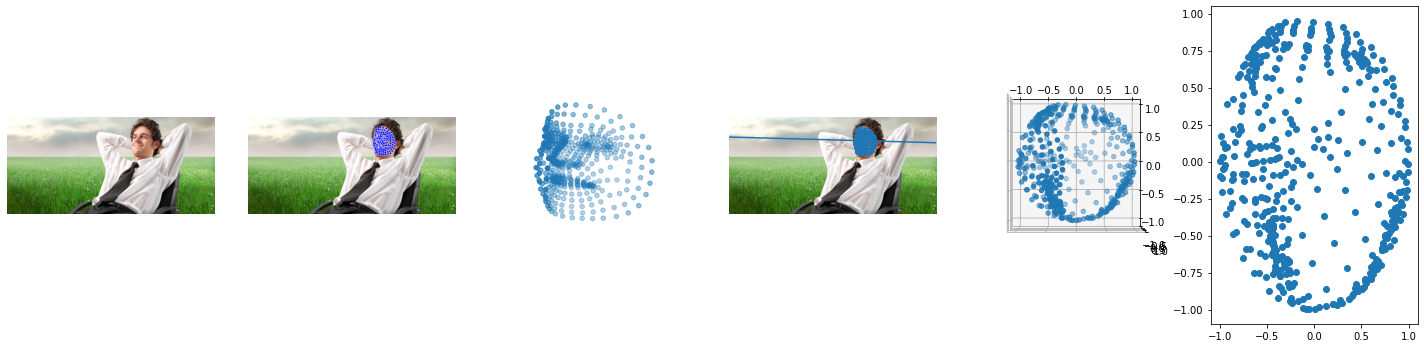

In [2]:
from preprocessing import generate_face_data
import os

EXAMPLE_FOLDER = os.path.join('example','inputs','preprocessing')

# For each image in the example/preprocessing folder
## Run the processing with plot=True
for fname in os.listdir(EXAMPLE_FOLDER):
    generate_face_data(os.path.join(EXAMPLE_FOLDER, fname), 
                   True)

The plots are as follows:
 - The original image
 - The original image with facial landmarks added on
 - The facial landmarks in 3-D space
 - The linear regression of the landmarks over the 2d plane, showing the expected split points
 - The points normalize and standardized to be between (-1, 1) in each axis
 - The above points plotted in the XY domain

## DCGAN
NOTE: THIS CODE WILL ATTEMPT TO RUN ON GPU, AND SAVE AN IMAGE

Run the DCGAN, which is based on this code: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

True
Random seed: 483
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
 

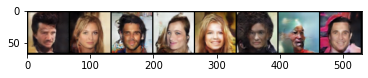

In [3]:
from base_dcgan import run_dcgan
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
run_dcgan()

samples = cv2.imread(os.path.join('example', 'outputs', 'dcgan_results', 'fake_samples_epoch_000.png'))
samples = cv2.cvtColor(samples, cv2.COLOR_BGR2RGB)
plt.imshow(samples)
plt.show()

A cDCGAN was also run, but due to errors is not replicated here. Instead, here is an example of it's failure:

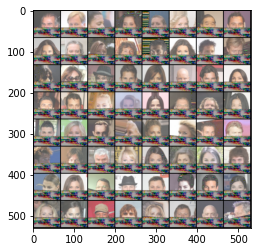

In [4]:
samples = cv2.imread(os.path.join('example', 'outputs', 'dcgan_results', 'cdcgan_results.png'))
samples = cv2.cvtColor(samples, cv2.COLOR_BGR2RGB)
plt.imshow(samples)
plt.show()

As you can see, the cDCGAN simply produced noise.